In [2]:
from IPython.display import Markdown, display
display(Markdown(open("./SM_header.md", "r").read()))

Copyright © 2025 Université Paris Cité

Author: [Guillaume Rousseau](https://www.linkedin.com/in/grouss/), Department of Physics, Paris, France (email: guillaume.rousseau@u-paris.fr)

This archive contains the supplemental materials and replication package associated with the preprint, "*Temporal and topological partitioning in real-world growing networks for scale-free properties study*", available on [arXiv](https://arxiv.org/abs/2501.10145) and [ssrn](http://ssrn.com/abstract=5191689).

The current version of the Python scripts and associated resources is available on the [author's GitHub page](https://github.com/grouss/growing-network-study).

This work is currently licensed under the [Creative Commons CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0).

To give appropriate credit and cite this work ([BibTeX entry](./rousseau2025temporal)):
Rousseau, G. (2025). *Temporal and topological partitioning in real-world growing networks for scale-free properties study* [Preprint]. arXiv:2501.10145. https://arxiv.org/abs/2501.10145; also available on SSRN: http://ssrn.com/abstract=5191689

 
# A) Replication Package

[Open the corresponding Replication Package notebook](./Replication_Package.ipynb)

# B) QuickStart Guide

[Open the corresponding QuickStart Guide notebook](./SM00_QuickStart.ipynb)

# C) Table of Contents

- 1. [Function Definitions](./SM01_Functions.ipynb)
- 2. [Dataset Import](./SM02_DatasetImport.ipynb)
- 3. [Building the Transposed Graph](./SM03_BuildingTransposedGraph.ipynb)
- 4. [Temporal Information Quality and Summary Statistics](./SM04_TemporalInformationMainStats.ipynb)
- 5. [Growth Relationship Between Nodes and Edges](./SM05_GrowingRules.ipynb)
- 6. [Topological Partitioning($RV$ Nodes)](./SM06_TopologicalPartitioning.ipynb)
- 7. [In-Degree and Out-Degree Distributions Over Time](./SM07_DegreeDistributionOverTime.ipynb)
- 8. [Distribution Tail Analysis](./SM08_DistributionTailAnalysis.ipynb)
- 9. [Temporal Partitioning](./SM09_TemporalPartitioning.ipynb)
- 10. [Derived $O-(RV/RL)-O$ Graph Construction](./SM10_DerivedGrowingNetwork.ipynb)
- 11. [Building the $TSL$ Partitioning](./SM11_TSLPartitioning.ipynb)
- 12. [Barabási–Albert Model Use Case](./SM12_BarabasiAlbertUseCase.ipynb)


**NB :** As of 2025/05/07, the QuickStart guide, the replication package, and SM01 to SM12 are available. The Python scripts are also provided under `local_utils` directory, but they are not in their final form and should be considered an alpha release. The graphs used in the study are available in a distinct Zenodo Deposit 10.5281/zenodo.15260640 ($\sim50$ Go), including the main dataset $O/RV/RL-O/RV/RL$ (2+ billions of nodes, $\sim4$ billions of edges), and two derived $O-(RV/RL)-O$ graphs ($\sim150$ millions nodes and edges). 

In [1]:
%load_ext autoreload
%autoreload 2

import importlib,sys,local_utils
from local_utils import *

print("___ Import data from graphpath=",config.graphpath)
print("___ Export data to exportpath=",config.exportpath)   

DisplayCopyrightInfo()


___ Import data from graphpath= ./ImportData/
___ Export data to exportpath= ./ExportData/
--------------------------------------------------------------------------------
Copyright 2025 Université Paris Cité, France 
Author: Guillaume Rousseau, Physics Department, Paris, France 

(https://www.linkedin.com/in/grouss/)

This archive contains the supplemental materials and replication package associated with the preprint available on :
- arXiv (https://arxiv.org/abs/2501.10145)
- SSRN  (http://ssrn.com/abstract=5191689

Current version of python scripts and associated ressources are available on author's github page
(https://github.com/grouss/growing-network-study)

This work is currently licensed under CC BY-NC-SA 4.0
(https://creativecommons.org/licenses/by-nc-sa/4.0)
--------------------------------------------------------------------------------



---

# 6 Topological partitioning (RV nodes)


We create by default 5 sub type of `RV` node corresponding to $\delta_{out}=0$, $\delta_{out}=1$,  $\delta_{out}\ge0$, $\delta_{out}\ge1$ and
$\delta_{out}\ge2$ 

A more generic approach is proposed later based on `TSL` types (see SM10 and SM11)

For each subcategory, we compute the number of new nodes and new edges associated per month.

Categorie sets ($\delta_{out}=0$, $\delta_{out}\ge1$) and ($\delta_{out}=0$, $\delta_{out}=1$, $\delta_{out}\ge2$) corespond to partions of the graph.

We can now investigate if one or more of this partitionning helps analysing of the growing rules (i.e. average number of new edges per new nodes over time) 

This part is very similar to previous one, but 
- focuses on `RV>RV` edges
- does not exclude supicious timestamp, since the out degree is an intrinsic properties
- uses source node timestamp only to determine edge creation date 
(Remember that in this study, more than 95% of `RV>RV` edges have a source node timestamp that is posterior to the target node timestamp.)

In [18]:
nodes,edges,nodesad,d,Nnodes,Nedges=LoadAllArray()   


In [7]:
# Can. be set to False if filepath=exportpath+"outdegree_RV_RV_month_1970_2030_20240917.pkl" exists
DEBUG=False
Rebuild=False
Fsave=False

In [ ]:
if DEBUG:
    if False:
        nodesTM=    [0,2,2,3,4,4,5,1633]
        nodesDegree=[2,1,0,2,2,1,1,5]
    elif False:
        nodesTM=    [2,2,3,4,4,5,1633]
        nodesDegree=[1,0,2,2,1,1,5]
    else:
        nodesTM=    [0,0,0,2,2,3,4,4,5,1633,1633]
        nodesDegree=[1,2,3,1,0,2,2,1,1,5,3]
    
    nodesTM=np.array(nodesTM)
    nodesDegree=np.array(nodesDegree)
    
    nodesStat,edgesStat=GetNodeEdgeStat(nodesTM,nodesDegree,debug=True)
    print(nodesStat[:10],nodesStat[-10:])
    print(edgesStat[:10],edgesStat[-10:])
    #[3 0 2 1 2 1 0 0 0 0] [0 0 0 0 0 0 0 0 0 2]
    #[6 0 1 2 3 1 0 0 0 0] [0 0 0 0 0 0 0 0 0 8]

In [ ]:
if Rebuild:
    arraytype,encoding=GetNodesTypesArray(nodes,edges,d)
    degreeout=nodes[1:]-nodes[:-1]
    del nodes
    
    # we focus in RV nodes
    for indextype,nodeType in enumerate(encoding):
        if nodeType=="RV":
            ti=time.time()
            mask_type=arraytype==indextype
            nodesadtypeTM=timestampsarray2yearmonth(nodesad[mask_type])
            degreeouttype=degreeout[mask_type]
            del mask_type 
            # argsort and sort only once (per type).
            print("start argsort")
            argsort=np.argsort(nodesadtypeTM)
            print("start reordering")
            degreeouttype=degreeouttype[argsort]
            nodesadtypeTM=nodesadtypeTM[argsort]
            del argsort 
    
            tf=time.time()
            print("Nodes TM Building ",np.round(tf-ti,2),"(s)")
    #start argsort
    #start reordering
    #Nodes TM Building  199.55 (s)



In [ ]:
if Rebuild:
    dout={}

    for degree in [0,1,2]:
        ti=time.time()
        print("start",nodeType,"d out ==",degree)
        mask_degree=degreeouttype==degree
        dout["nodes_dout=="+str(degree)],dout["edges_dout=="+str(degree)]=GetNodeEdgeStat(nodesadtypeTM[mask_degree],degreeouttype[mask_degree])
        tf=time.time()
        print("___ Elapse ",np.round(tf-ti,2),"(s)")   
    print()
    for degree in [0,1,2]:
        ti=time.time()
        print("start",nodeType,"d out >=",degree)
        mask_degree=degreeouttype>=degree
        dout["nodes_dout>="+str(degree)],dout["edges_dout>="+str(degree)]=GetNodeEdgeStat(nodesadtypeTM[mask_degree],degreeouttype[mask_degree])
        tf=time.time()
        print("___ Elapse ",np.round(tf-ti,2),"(s)")          
    
    print()
    for degree in [0,1,2]:
        ti=time.time()
        print("start",nodeType,"d out >",degree)
        mask_degree=degreeouttype>degree
        dout["nodes_dout>"+str(degree)],dout["edges_dout>"+str(degree)]=GetNodeEdgeStat(nodesadtypeTM[mask_degree],degreeouttype[mask_degree])
        tf=time.time()
        print("___ Elapse ",np.round(tf-ti,2),"(s)")          

In [24]:
if Fsave:
    print(list(dout.keys()))
    filepath=exportpath+"outdegree_RV_RV_month_1970_2030_20240917.pkl"
    pickle.dump(dout,open(filepath,"wb"))

**Comment :** *nodes_dout>=0* and *edges_dout>=0* include all nodes and edges.

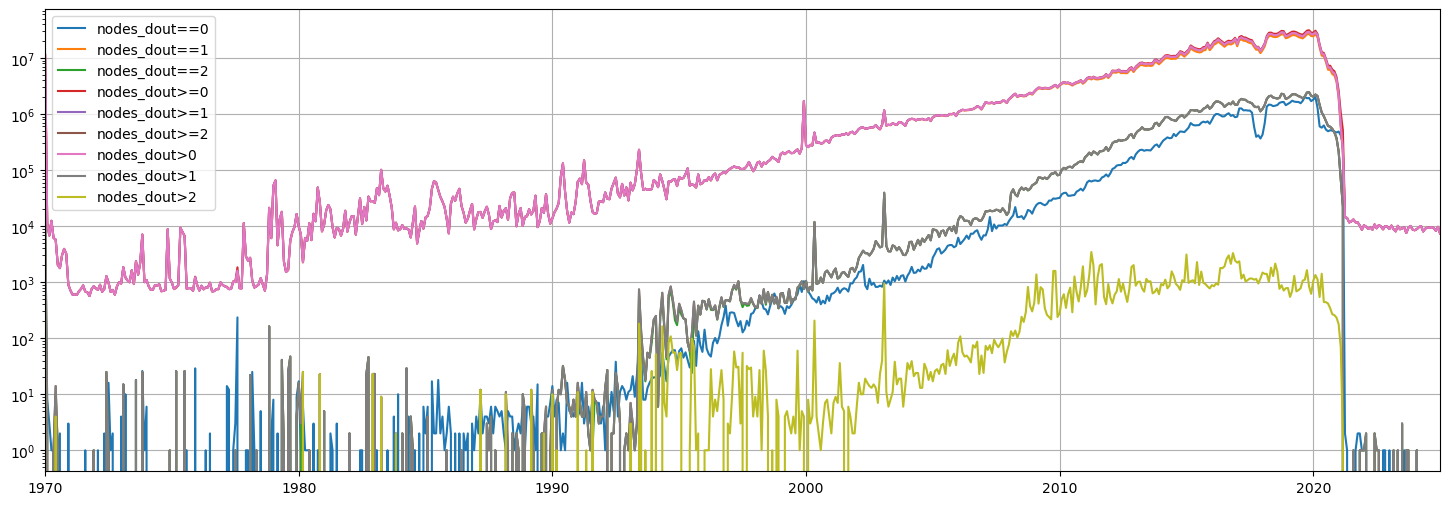

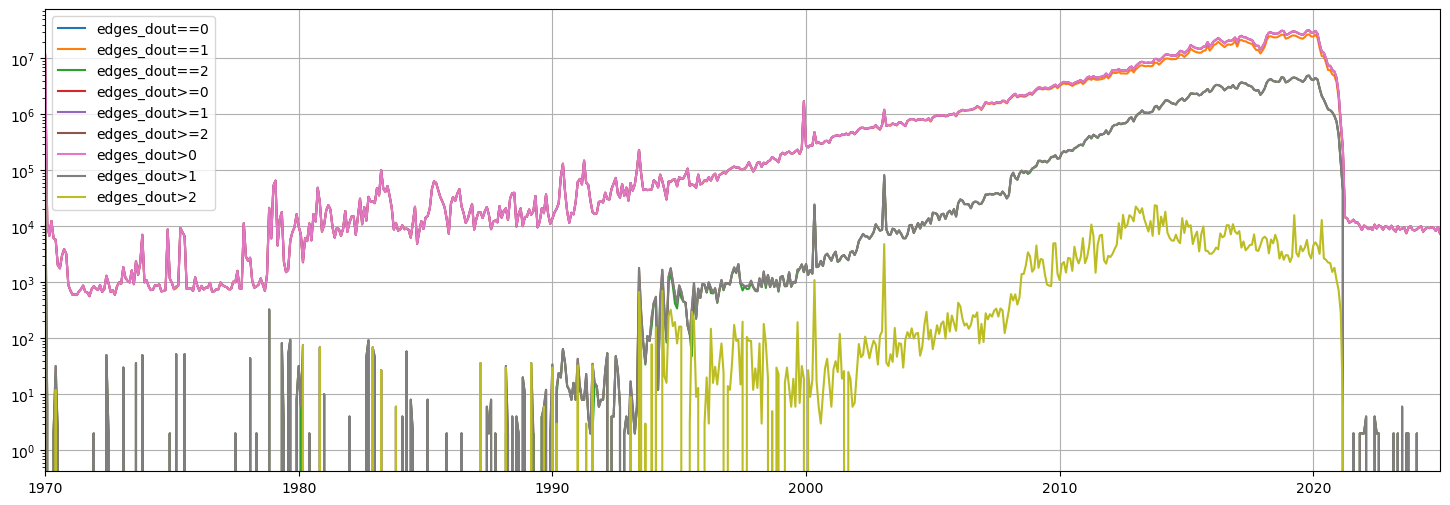

In [8]:
filepath=exportpath+"outdegree_RV_RV_month_1970_2030_20240917.pkl"
dout=pickle.load(open(filepath,"rb"))
for match in ["nodes","edges"]:
    plt.figure(figsize=(18,6))
    for key,value in dout.items():
        if match in key:
            plt.plot(1970+np.arange(len(value))/12,value,label=key)
    plt.legend()
    plt.yscale('log')
    plt.xlim(1970,2025)
    plt.grid()
    plt.show()

**Comment :** Simple representation displaying for each subtypes, the ratio new edges over vs new nodes over time (cumulated over 1 month)

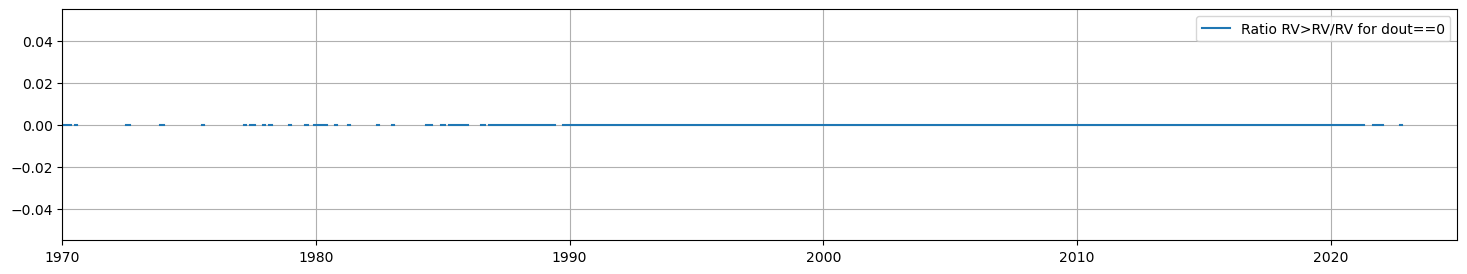

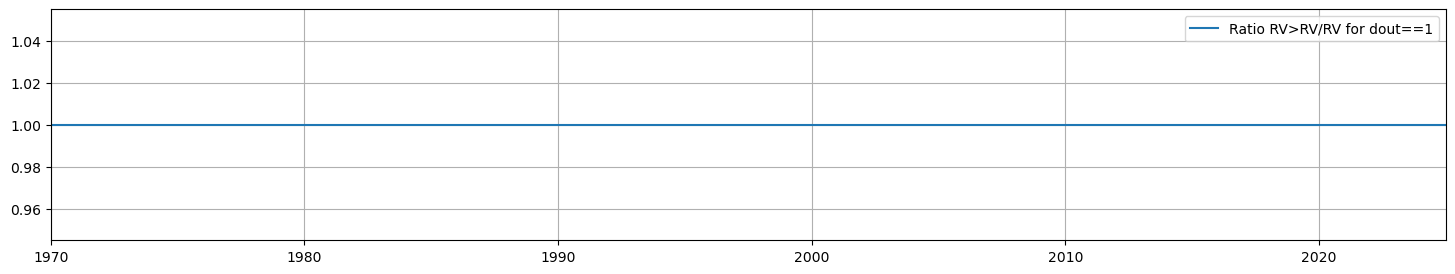

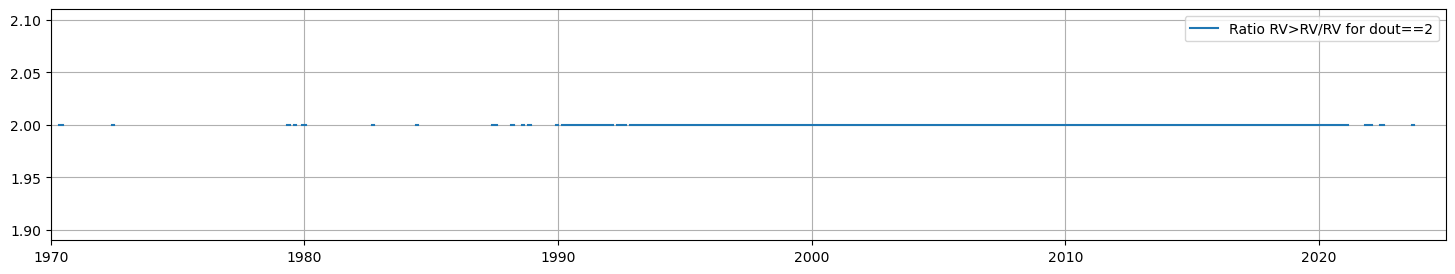

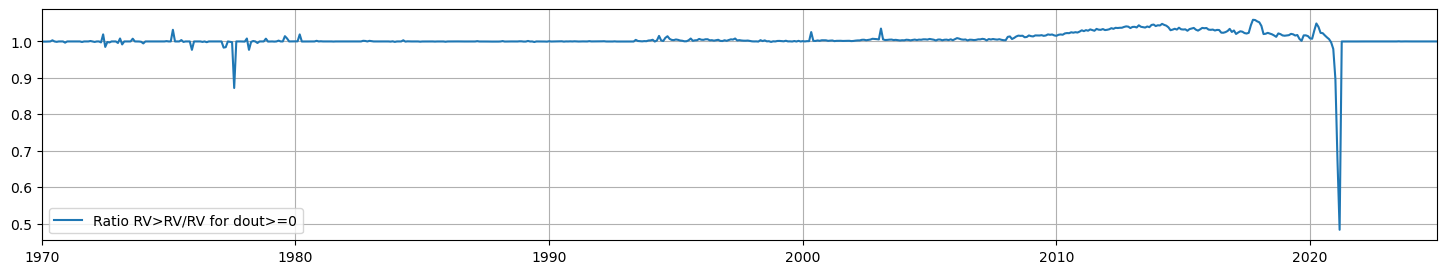

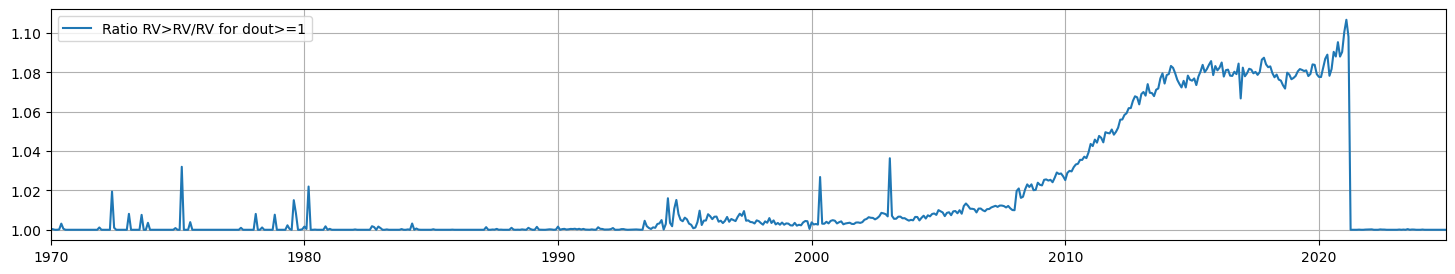

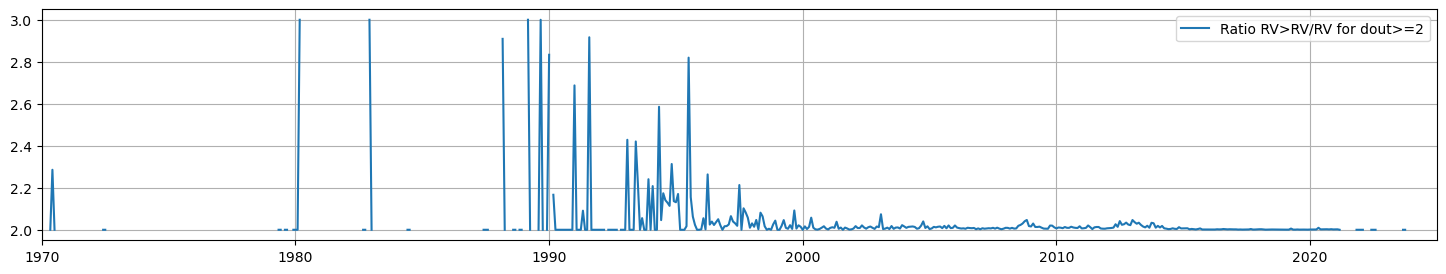

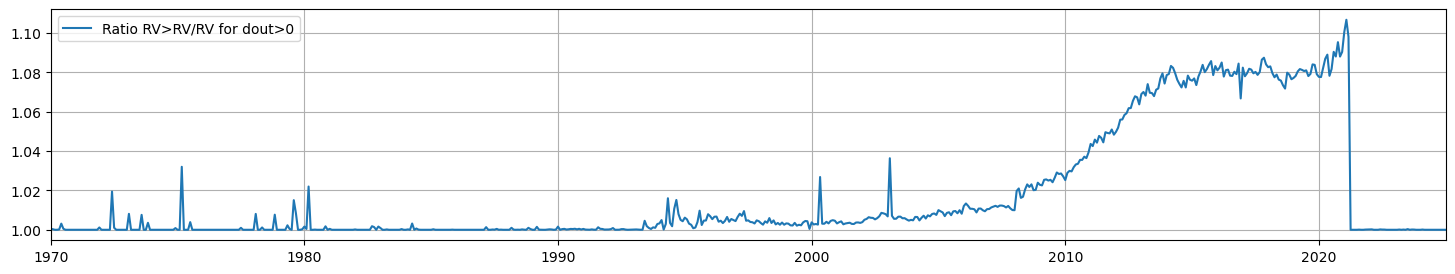

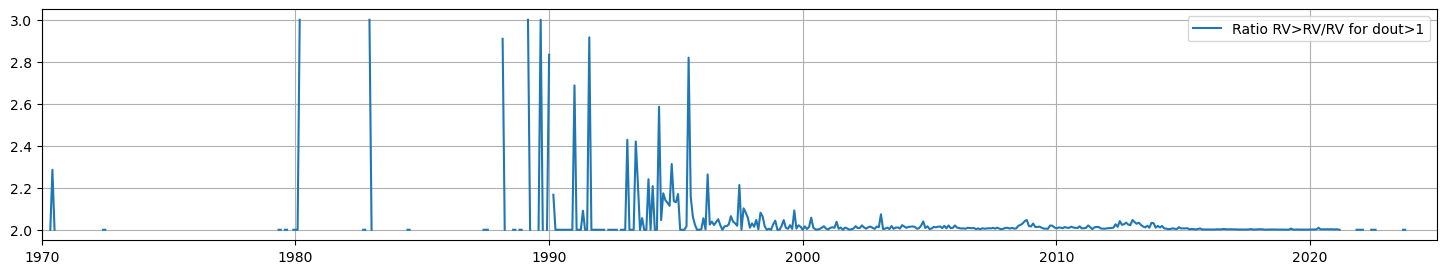

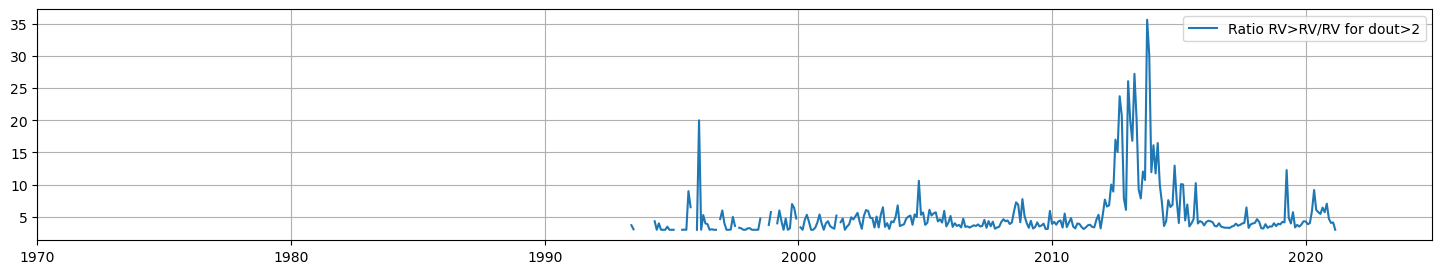

In [18]:
x=1970+np.arange(len(value))/12
mask=np.logical_and(x>1970,x<=2025)
for key,value in dout.items():
    if "nodes" in key:
        plt.figure(figsize=(18,3))
        z=value
        y=dout["edges_"+key[6:]]
        plt.plot(x[mask],(y/z)[mask],label="Ratio RV>RV/RV for "+key[6:])
        plt.legend()
        #mask=
        #if ">" in key[6:]:
        #    plt.yscale('log') 
        #    plt.ylim(0.8,max(y/z)*1.2)
        plt.xlim(1970,2025)
        plt.grid()
        plt.show()


**Comment :** This view can show small variations in the average number of new edges per new node, which are not visible on the previous log-log scale representation of the number of new edges versus new nodes. 

The same figures can be created using the edges' *True* creation timestamp, i.e., using the larger timestamp from the source and target nodes, or a native timestamp if available.


## In the scope of this study

This is how to build the corresponding figure in the article 

NB : figure in the article use edges' *true* creation time, and not the source node timestamp. No notable difference is observed between the two figures.

We can then investigate different graph partitions. 


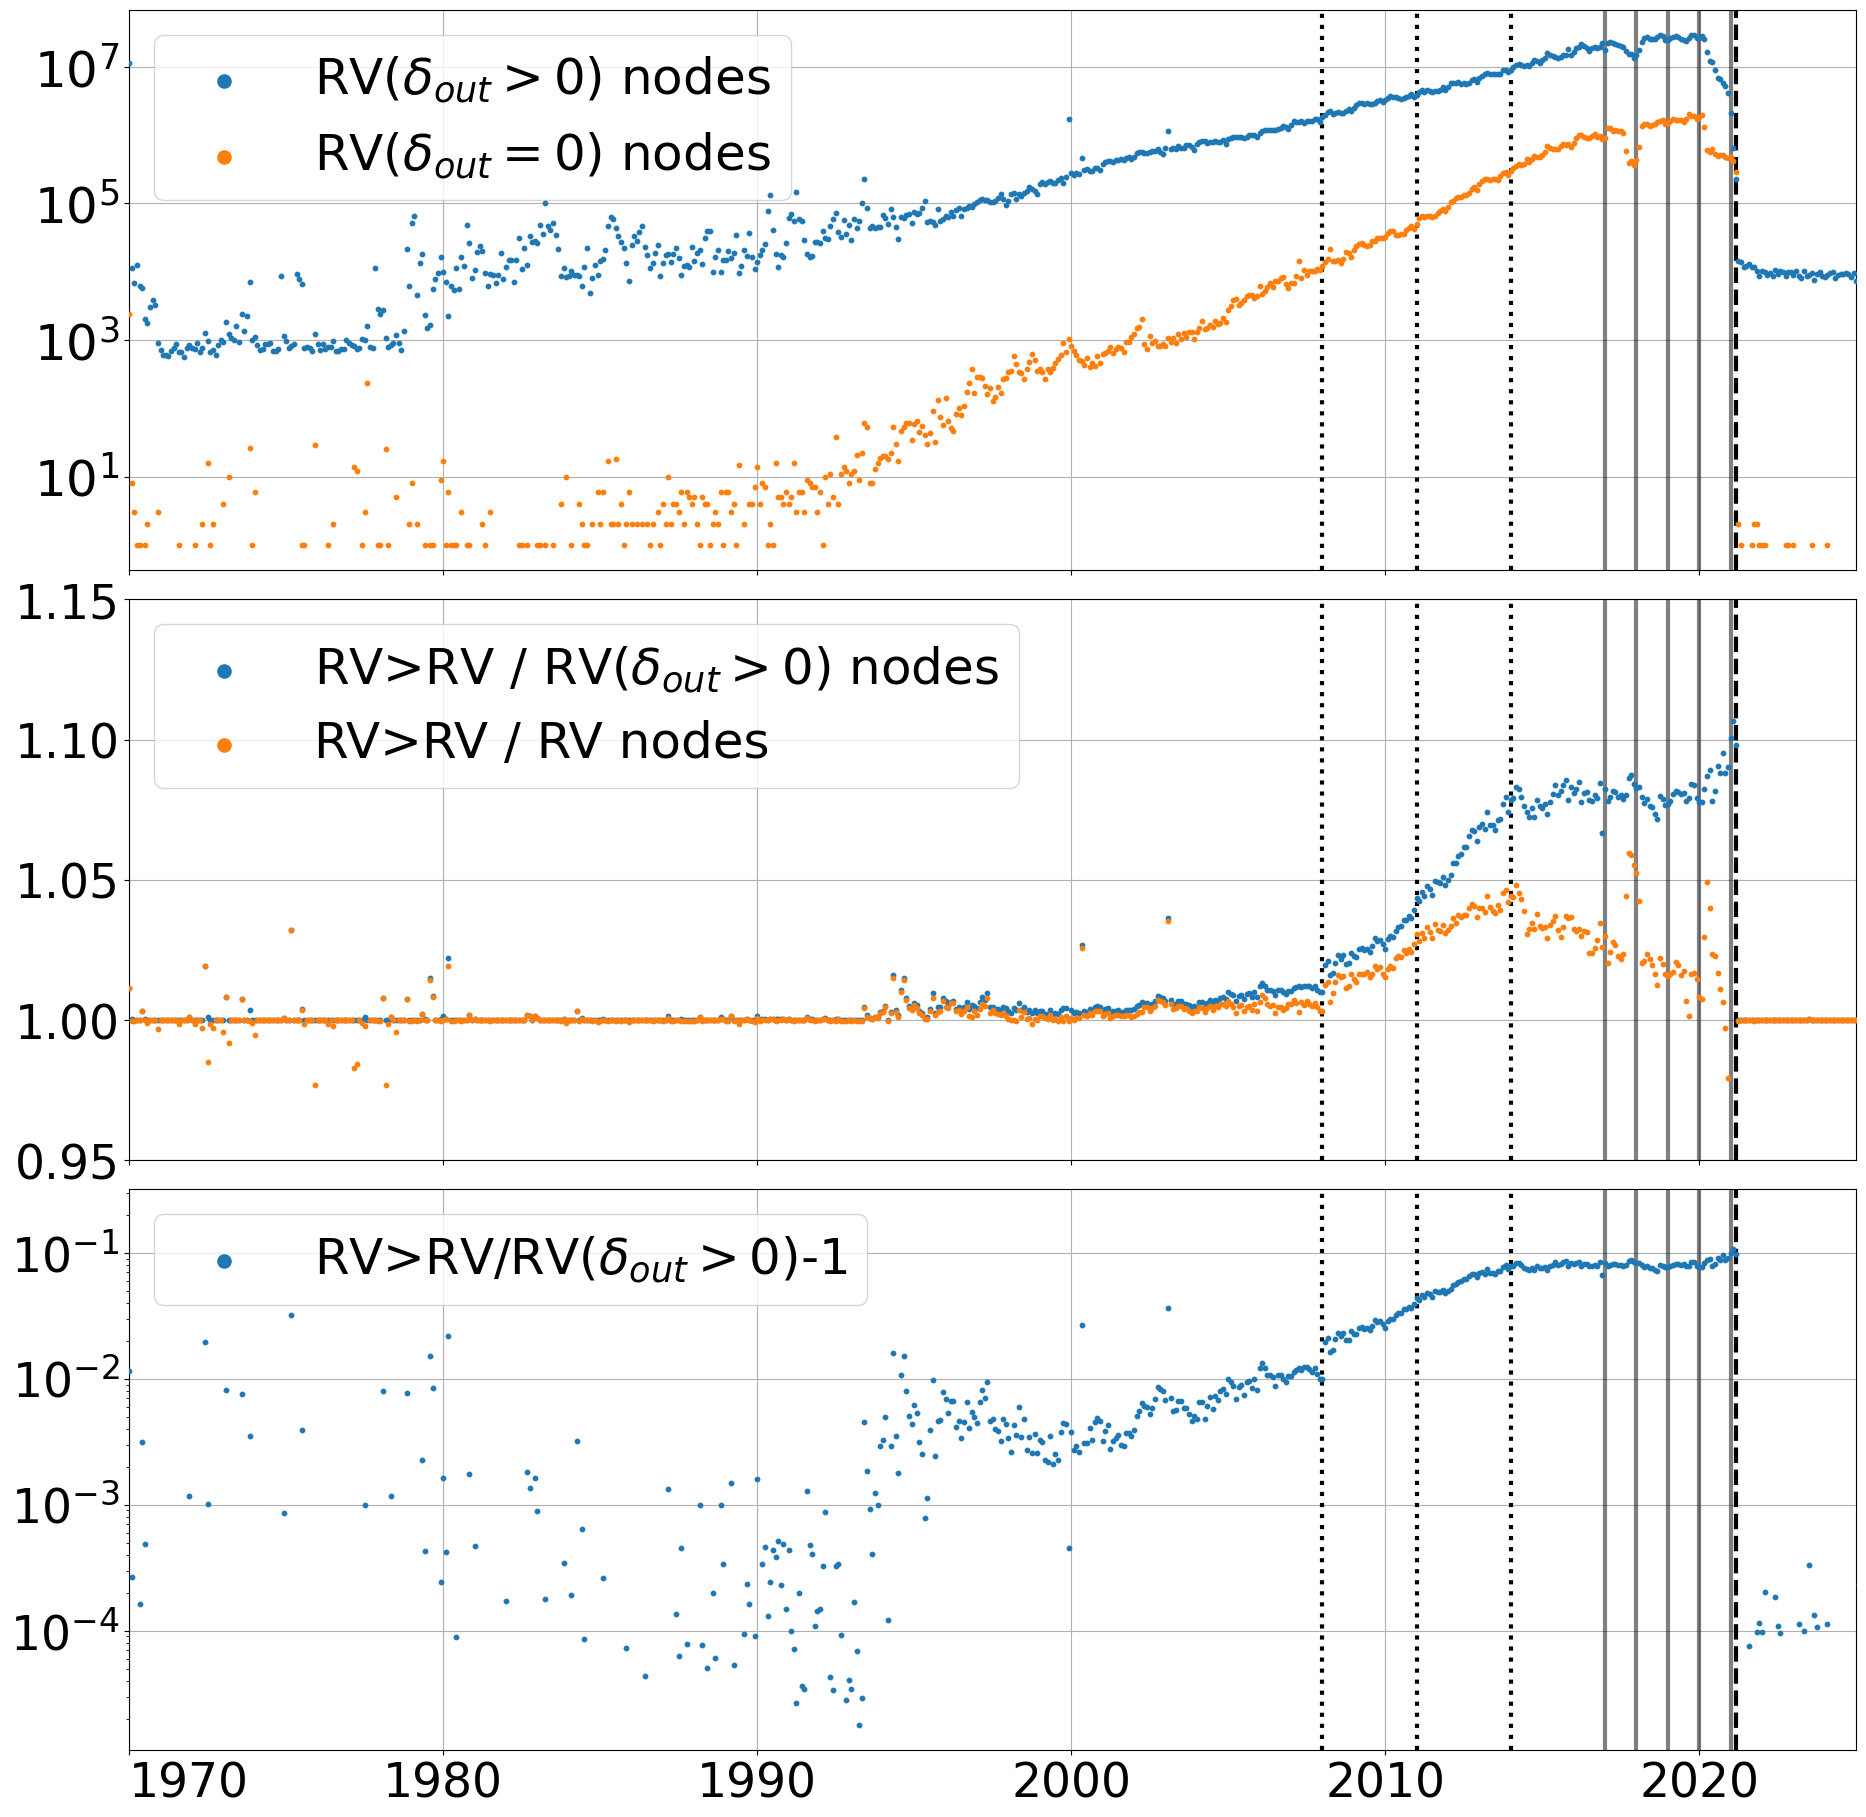

In [19]:
outdegree_RV_RV_month=pickle.load(open(exportpath+"outdegree_RV_RV_month_1970_2030_20240917.pkl","rb"))

RV_0=outdegree_RV_RV_month["nodes_dout==0"]
RV_1plus=outdegree_RV_RV_month["nodes_dout>=1"]
RV_RV=outdegree_RV_RV_month["edges_dout>=0"]


datearray=1970+np.arange(1634)/12 # month since epoch to year+mont/12 (month in [0,11])


def verticalline(fig,axs):
        #plt.axvline(x=2017,color='k',label="2017/18/19/20/21",alpha=0.5)
        alpha=0.5
        lw=3
        for year in range(2017,2022):
            axs.axvline(x=year,color='k',alpha=alpha,lw=lw)
        axs.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
        month=0
        for year in [2008,2011,2014]:
            axs.axvline(x=year+month/12,color='k',linestyle=':',alpha=1,lw=lw)
    
        xticklabels=axs.get_xticklabels()
        for i, label in enumerate(xticklabels):
            if i == 0:  
                label.set_horizontalalignment('left')
            elif i == len(xticklabels) - 1:  
                label.set_horizontalalignment('right')
            else:  
                label.set_horizontalalignment('center')

nfig=3

fontsize=FontSize[nfig]

fig, axs = plt.subplots(nfig,figsize=(18,6*nfig),sharex=True)   

plt.tight_layout()
for i in range(nfig):
    axs[i].set_xlim(1970,2025)
    axs[i].grid()
    

#axs[0].scatter(datearray,RV_0+RV_1plus,s=15,zorder=10,label="RV nodes")
axs[0].scatter(datearray,RV_1plus,s=10,zorder=10,label=r'RV($\delta_{out}>0$) nodes')
axs[0].scatter(datearray,RV_0,s=10,zorder=10,label=r'RV($\delta_{out}=0$) nodes')
axs[0].legend(loc='upper left',fontsize=FontSize[nfig],ncol=1,markerscale=3)
axs[0].tick_params(axis='both',which='major',labelsize=FontSize[nfig])
axs[0].set_yscale("log") 
verticalline(fig,axs[0])

axs[1].scatter(datearray,RV_RV/(RV_1plus),s=10,zorder=10,label=r'RV>RV / RV($\delta_{out}>0$) nodes')
axs[1].scatter(datearray,RV_RV/(RV_0+RV_1plus),s=10,zorder=10,label="RV>RV / RV nodes")
axs[1].legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=3)
axs[1].set_ylim(0.95,1.15)
axs[1].tick_params(axis='both',which='major',labelsize=fontsize-2)
verticalline(fig,axs[1])

#axs[2].scatter(datearray,RV_RV/(RV_0+RV_1plus),s=10,zorder=10,label="RV>RV/RV nodes")
axs[2].scatter(datearray,(RV_RV-RV_1plus)/(RV_1plus),s=10,zorder=10,label=r'RV>RV/RV($\delta_{out}>0$)-1')
axs[2].legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=3)
#axs[2].set_ylim(0.95,1.15)
axs[2].set_yscale("log") 
axs[2].tick_params(axis='both',which='major',labelsize=fontsize-2)
verticalline(fig,axs[2])


plt.show()

**Comment** : See the discussion in the article regarding topological partitioning and evolution rules. 

In practice, it mainly shows that revision nodes with $\delta_{out} = 1$ are the ones for which the evolution rule differs from those with $\delta_{out} = 0$ and $\delta_{out} \geq 2$

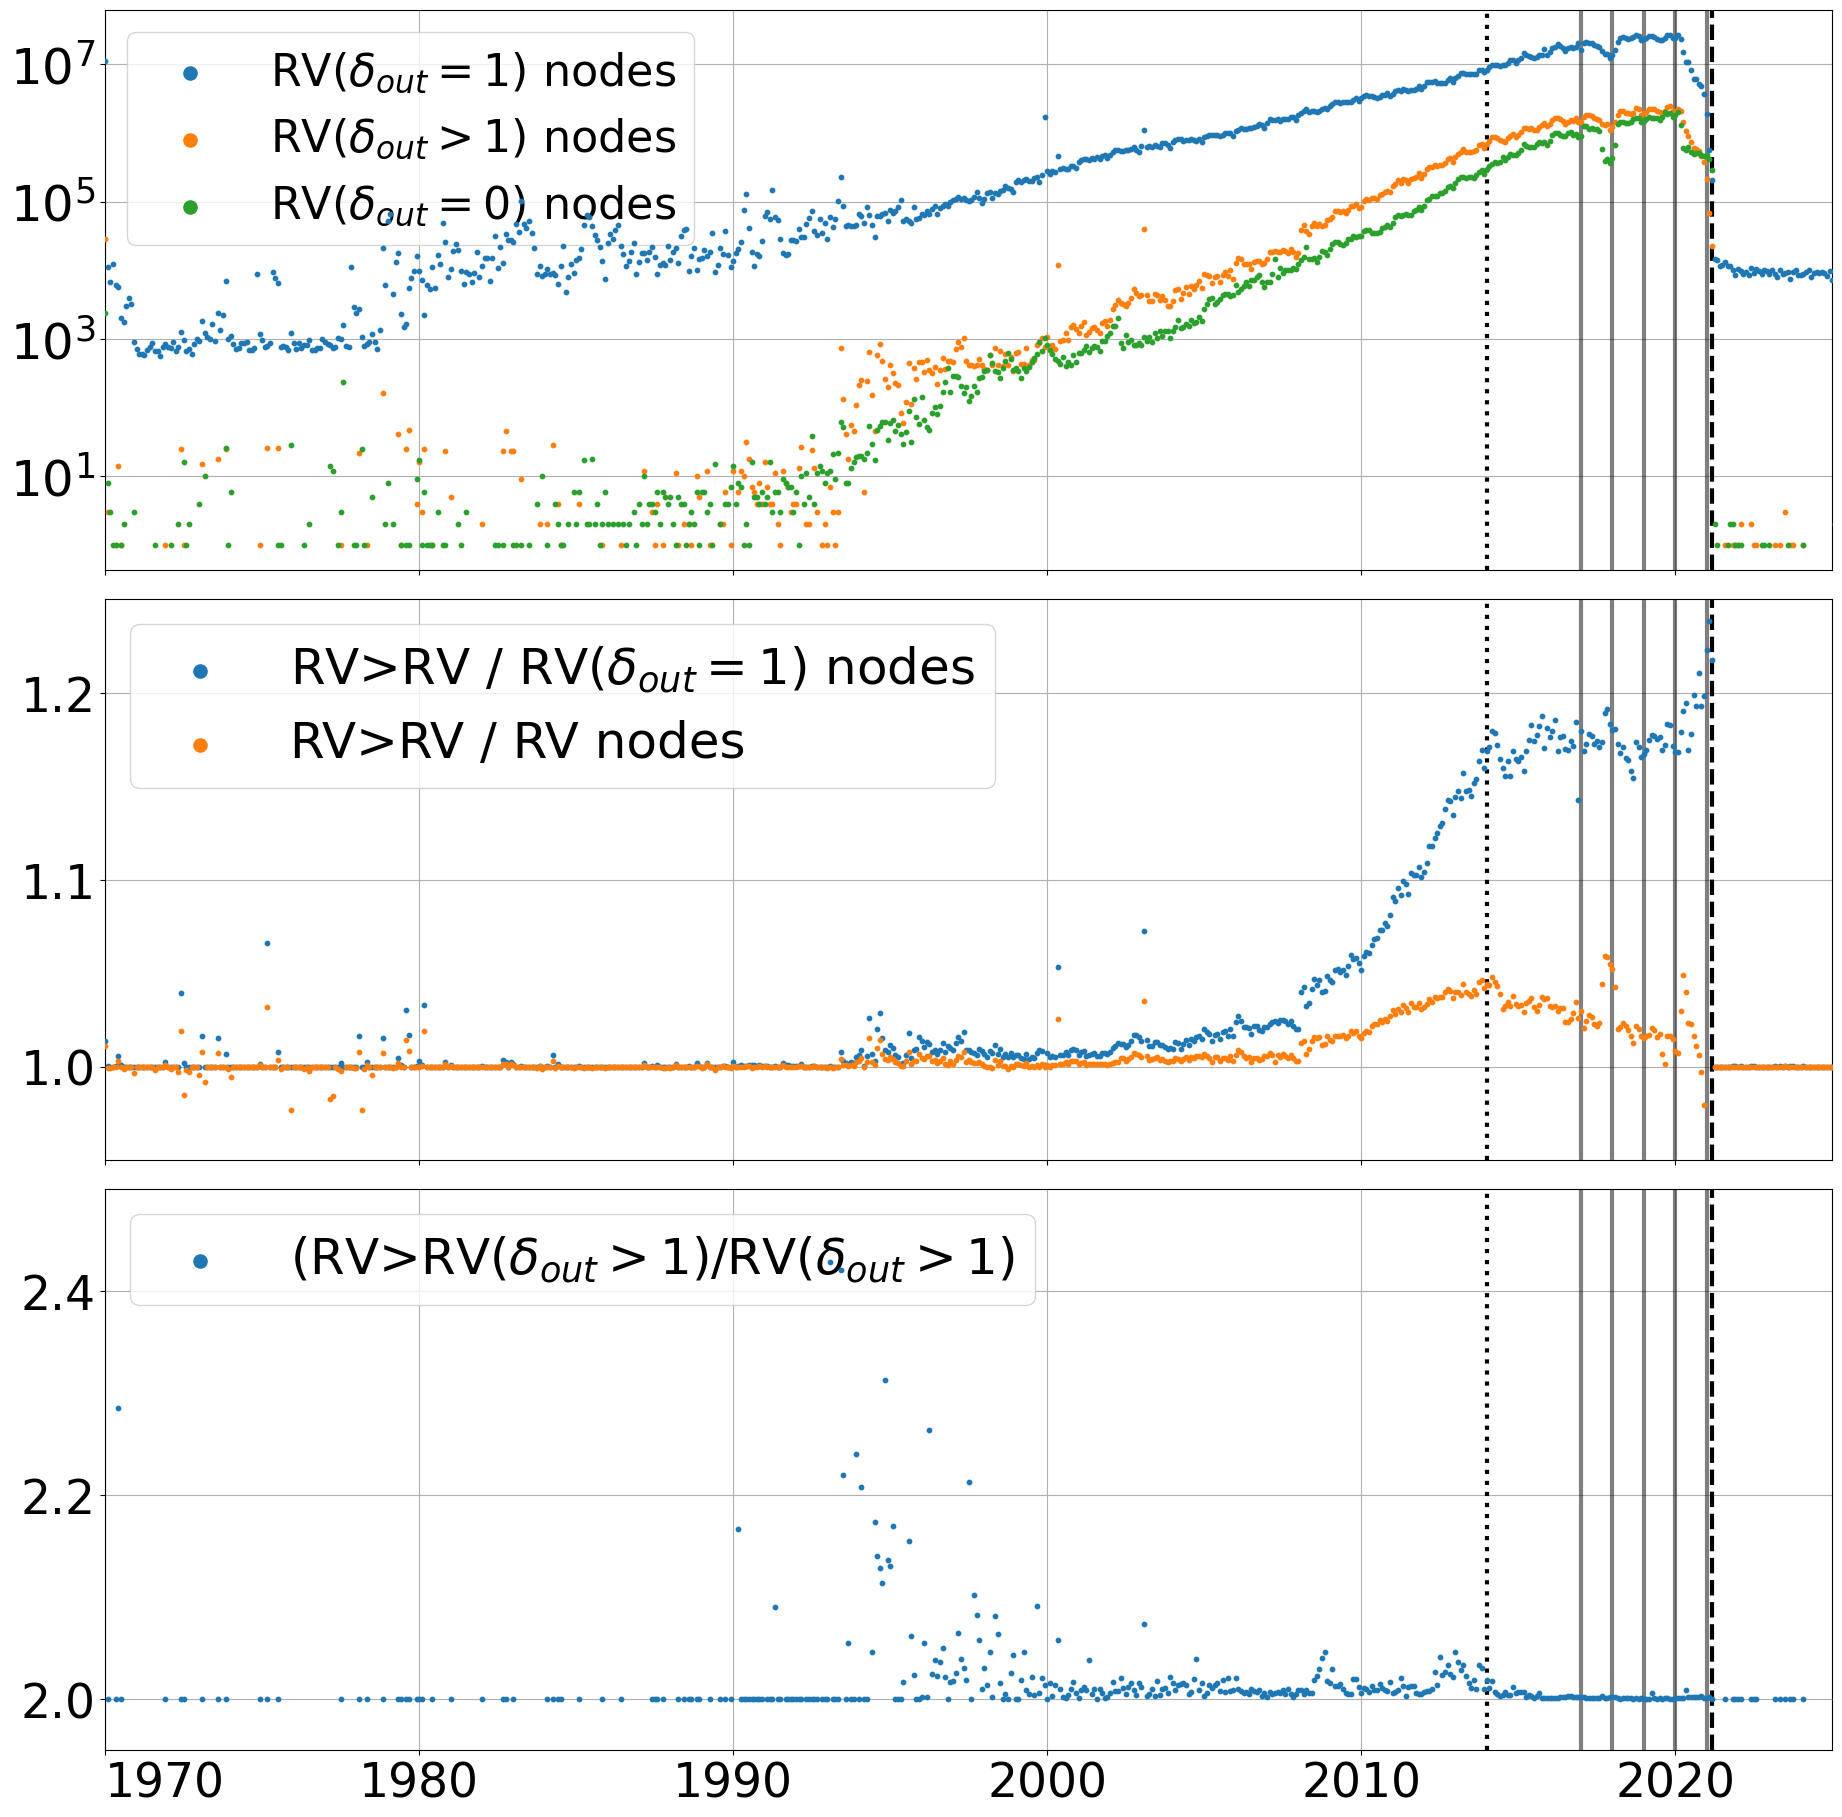

In [11]:
outdegree_RV_RV_month=pickle.load(open(exportpath+"outdegree_RV_RV_month_1970_2030_20240917.pkl","rb"))

RV_0=outdegree_RV_RV_month["nodes_dout==0"]
RV_1=outdegree_RV_RV_month["nodes_dout==1"]

RV_2plus=outdegree_RV_RV_month["nodes_dout>=2"]
RV_RV_2plus=outdegree_RV_RV_month["edges_dout>=2"]

RV_RV=outdegree_RV_RV_month["edges_dout>=0"] # all nodes
RV=outdegree_RV_RV_month["nodes_dout>=0"] # all nodes


datearray=1970+np.arange(1634)/12



def verticalline(fig,axs):
        #plt.axvline(x=2017,color='k',label="2017/18/19/20/21",alpha=0.5)
        alpha=0.5
        lw=3
        axs.axvline(x=2017,color='k',alpha=alpha,lw=lw)
        axs.axvline(x=2018,color='k',alpha=alpha,lw=lw)
        axs.axvline(x=2019,color='k',alpha=alpha,lw=lw)
        axs.axvline(x=2020,color='k',alpha=alpha,lw=lw)
        axs.axvline(x=2021,color='k',alpha=alpha,lw=lw)
        #plt.axvline(x=2021+(3-1)/12,color='k',linestyle='--',label="dataset dump date",alpha=0.5)
        axs.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
        #plt.axvline(x=2014+(1-1)/12,color='k',linestyle=':',label="2014/01/01",alpha=1)
        axs.axvline(x=2014+(1-1)/12,color='k',linestyle=':',alpha=1,lw=lw)
        #ax = plt.gca()
        xticklabels=axs.get_xticklabels()
        for i, label in enumerate(xticklabels):
            if i == 0:  
                label.set_horizontalalignment('left')
            elif i == len(xticklabels) - 1:  
                label.set_horizontalalignment('right')
            else:  
                label.set_horizontalalignment('center')

nfig=3

fontsize=FontSize[nfig]

fig, axs = plt.subplots(nfig,figsize=(18,6*nfig),sharex=True)   

plt.tight_layout()
for i in range(nfig):
    axs[i].set_xlim(1970,2025)
    axs[i].grid()
    

#axs[0].scatter(datearray,RV_0+RV_1plus,s=15,zorder=10,label="RV nodes")
axs[0].scatter(datearray,RV_1,s=10,zorder=10,label=r'RV($\delta_{out}=1$) nodes')
axs[0].scatter(datearray,RV_2plus,s=10,zorder=10,label=r'RV($\delta_{out}>1$) nodes')
axs[0].scatter(datearray,RV_0,s=10,zorder=10,label=r'RV($\delta_{out}=0$) nodes')
axs[0].legend(loc='upper left',fontsize=FontSize[nfig]-4,ncol=1,markerscale=3)
axs[0].tick_params(axis='both',which='major',labelsize=FontSize[nfig])
axs[0].set_yscale("log") 
verticalline(fig,axs[0])

axs[1].scatter(datearray,RV_RV/(RV_1),s=10,zorder=10,label=r'RV>RV / RV($\delta_{out}=1$) nodes')
axs[1].scatter(datearray,RV_RV/(RV_0+RV_1+RV_2plus),s=10,zorder=10,label="RV>RV / RV nodes")
axs[1].legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=3)
axs[1].set_ylim(0.95,1.25)
axs[1].tick_params(axis='both',which='major',labelsize=fontsize-2)
verticalline(fig,axs[1])

axs[2].scatter(datearray,(RV_RV_2plus)/(RV_2plus),s=10,zorder=10,label=r'(RV>RV($\delta_{out}>1$)/RV($\delta_{out}>1$)')
#axs[2].scatter(datearray,(RV_RV_2plus)/(RV_2plus),s=10,zorder=10,label=r'(RV>RV-RV($\delta_{out}=1$)/RV($\delta_{out}>1$)')
#axs[2].scatter(datearray,(RV_RV-RV_1)/(RV_0+RV_2plus),s=10,zorder=10,label=r'(RV>RV-RV($\delta_{out}=1$)/RV($\delta_{out}\ne1$)')
#axs[2].scatter(datearray,(RV_RV-RV_1)/(RV_1),s=10,zorder=10,label=r'RV>RV/RV($\delta_{out}=1$)-1')
axs[2].legend(loc='upper left',fontsize=fontsize,ncol=1,markerscale=3)
axs[2].set_ylim(1.95,2.5)
#axs[2].set_yscale("log") 
axs[2].tick_params(axis='both',which='major',labelsize=fontsize-2)
verticalline(fig,axs[2])

plt.show()